##### Universidade Federal de São Carlos - UFSCar <br>Centro de Ciências Exatas e Tecnólogicas - CCET

# Trabalho de Graduação A
### Uma abordagem estatística sobre a estimação de _redshifts_ de quasares usando dados do S-PLUS
#### Análise preliminar dos modelos de densidade condicional

Discente: Gabriela Pereira Soares<br>Orientador: Rafael Izbicki<br>Co-orientadora: Lilianne Nakazono

Abril de 2021

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats
import flexcode
import warnings
from flexcode.regression_models import RandomForest
from flexcode.regression_models import XGBoost
from flexcode.regression_models import NN
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
#import sys
#!{sys.executable} -m pip install xgboost

In [5]:
#conda install git
#import sys
#!conda install --yes --prefix {sys.prefix} git

Solving environment: ...working... done

# All requested packages already installed.



Vamos carregar o mesmo conjunto de dados utilizado na pesquisa de Raquel para que o experimento seja comparável.

In [2]:
caminho = "C:/Users/Gabriela/Documents/TG/Análises Preliminares/database/"

# Carregando os dados de treinamento
trainfold0 = pd.read_csv(caminho+"trainfold0.csv", low_memory=False)
trainfold1 = pd.read_csv(caminho+"trainfold1.csv", low_memory=False)
trainfold2 = pd.read_csv(caminho+"trainfold2.csv", low_memory=False)
trainfold3 = pd.read_csv(caminho+"trainfold3.csv", low_memory=False)
trainfold4 = pd.read_csv(caminho+"trainfold4.csv", low_memory=False)

# Carregando os dados de validação
validationfold0 = pd.read_csv(caminho+"validationfold0.csv", low_memory=False)
validationfold1 = pd.read_csv(caminho+"validationfold1.csv", low_memory=False)
validationfold2 = pd.read_csv(caminho+"validationfold2.csv", low_memory=False)
validationfold3 = pd.read_csv(caminho+"validationfold3.csv", low_memory=False)
validationfold4 = pd.read_csv(caminho+"validationfold4.csv", low_memory=False)

# Carregando a amostra de teste
test = pd.read_csv(caminho+"test.csv", low_memory=False)

In [ ]:
# Dados completos (original)
#dados = pd.read_csv("C:/Users/Gabriela/Documents/TG/iDR3n4_DR16Q_GALEX2.csv", low_memory=False)

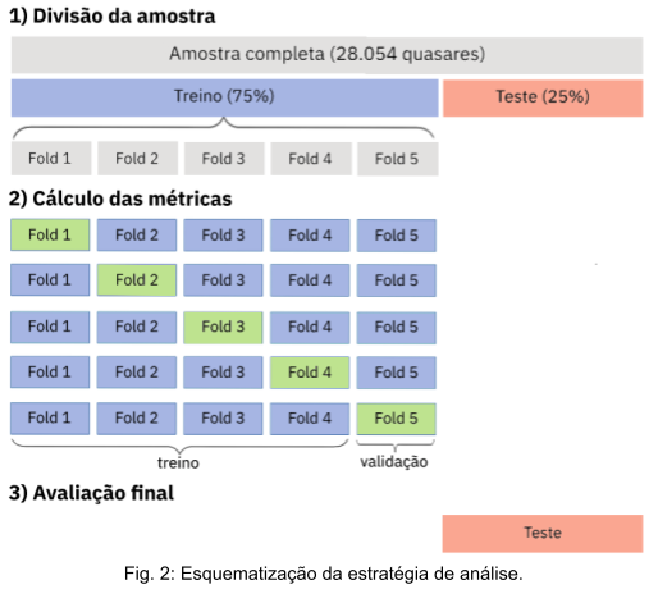

In [5]:
# Esquematização da divisão da amostra
from IPython.display import Image
Image("C:/Users/Gabriela/Documents/TG/Análises Preliminares/data_splitting.png", width = 400, height = 200)

A divisão da Raquel foi realizada de forma estratificada, de forma a manter a proporção em cada intervalo de _redshift_.

In [6]:
# 67 colunas a mais que o banco de dados que usava antes
#print(trainfold0.shape[1],dados.shape[1])

In [7]:
# Provavelmente as linhas já estão tratadas e limpadas
#print(trainfold0.shape[0]+validationfold0.shape[0]+test.shape[0],dados.shape[0])

In [8]:
# Verificando o intervalo da banda r_iso
pd.concat([trainfold0['r_iso'].describe(),
           trainfold1['r_iso'].describe(),
           trainfold2['r_iso'].describe(),
           trainfold3['r_iso'].describe(),
           trainfold4['r_iso'].describe(),
           validationfold0['r_iso'].describe(),
           validationfold1['r_iso'].describe(),
           validationfold2['r_iso'].describe(),
           validationfold3['r_iso'].describe(),
           validationfold4['r_iso'].describe()], axis=1)

,r_iso,r_iso,r_iso,r_iso,r_iso,r_iso,r_iso,r_iso,r_iso,r_iso
count,16399.000000,16402.000000,16403.000000,16404.000000,16400.000000,4103.000000,4100.000000,4099.000000,4098.000000,4102.000000
mean,20.723596,20.725993,20.720972,20.717722,20.724424,20.718325,20.708733,20.728821,20.741832,20.715013
std,0.916784,0.917595,0.918316,0.920773,0.912950,0.919392,0.916032,0.913241,0.903048,0.934496
min,15.399064,15.439690,15.399064,15.399064,15.399064,15.542829,15.399064,15.439690,16.437181,15.551054
25%,20.170027,20.169687,20.169656,20.168970,20.181779,20.177222,20.179999,20.180906,20.192614,20.139123
50%,20.889475,20.895566,20.887457,20.887714,20.891255,20.893751,20.866538,20.906725,20.902714,20.888114
75%,21.456095,21.455864,21.447852,21.445717,21.449716,21.435050,21.436702,21.464297,21.469275,21.456710
max,21.999947,21.999947,21.999947,21.999947,21.999794,21.999458,21.999084,21.999594,21.999794,21.999947


In [9]:
# Verificando o intervalo do redshift
pd.concat([trainfold0['Z'].describe(),
           trainfold1['Z'].describe(),
           trainfold2['Z'].describe(),
           trainfold3['Z'].describe(),
           trainfold4['Z'].describe(),
           validationfold0['Z'].describe(),
           validationfold1['Z'].describe(),
           validationfold2['Z'].describe(),
           validationfold3['Z'].describe(),
           validationfold4['Z'].describe()], axis=1)

,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z
count,16413.000000,16413.000000,16414.000000,16414.000000,16414.000000,4104.000000,4104.000000,4103.000000,4103.000000,4103.000000
mean,1.621969,1.621667,1.622425,1.621623,1.621371,1.621180,1.622387,1.619355,1.622563,1.623570
std,0.756927,0.757089,0.757353,0.756156,0.756735,0.756623,0.755973,0.754909,0.759700,0.757388
min,0.034357,0.034357,0.058000,0.034357,0.034357,0.085000,0.060000,0.034357,0.086661,0.058000
25%,1.055000,1.058785,1.058198,1.057000,1.056591,1.064895,1.053910,1.053423,1.056855,1.059704
50%,1.540882,1.538583,1.536436,1.540000,1.538069,1.532065,1.538904,1.546375,1.534165,1.543159
75%,2.090864,2.090764,2.093043,2.089928,2.092505,2.090549,2.093468,2.089048,2.101429,2.087867
max,6.999202,6.999202,6.999202,6.981287,6.999202,6.957502,6.701882,6.767416,6.999202,6.981287


In [10]:
pd.concat([test['r_iso'].describe(),test['Z'].describe()], axis=1)

,r_iso,Z
count,6833.000000,6840.000000
mean,20.706837,1.618601
std,0.939656,0.757732
min,15.472568,0.060000
25%,20.177694,1.059014
50%,20.884483,1.535217
75%,21.434881,2.087673
max,21.999937,6.772872


Vemos que os dados já estão filtrados com $0 < Z \le 7$ e $r \ge 22$.

## Tratativa banco de dados

Vamos filtrar as colunas para tomarmos apenas as 12 bandas S-PLUS em todas aberturas + bandas WISE + bandas GALEX e seus respectivos erros.

In [3]:
# Renomeando filtros de banda estreita para nova nomenclatura

def replace_all(dados, dic):
    cols = dados.columns.values
    for i, j in dic.items():
        cols = [w.replace(i, j) for w in cols]
    return cols

dic = {'F378':'J0378', 'F395':'J0395', 'F410':'J0410', 'F430':'J0430', 
       'F515':'J0515', 'F660':'J0660', 'F861':'J0861', 'r_iso':'R_iso',
       'u_iso':'U_iso','g_iso':'G_iso','i_iso':'I_iso','z_iso':'Z_iso'}

trainfold0.columns = replace_all(trainfold0,dic)
trainfold1.columns = replace_all(trainfold1,dic)
trainfold2.columns = replace_all(trainfold2,dic)
trainfold3.columns = replace_all(trainfold3,dic)
trainfold4.columns = replace_all(trainfold4,dic)

validationfold0.columns = replace_all(validationfold0,dic)
validationfold1.columns = replace_all(validationfold1,dic)
validationfold2.columns = replace_all(validationfold2,dic)
validationfold3.columns = replace_all(validationfold3,dic)
validationfold4.columns = replace_all(validationfold4,dic)

test.columns = replace_all(test,dic)

In [4]:
apers = ["auto", "aper_3", "aper_6", "iso", "petro", "PStotal"] # abertura isofótica
feat_broad = ['U', 'G', 'R', 'I', 'Z'] # banda larga
feat_narrow = ['J0378', 'J0395', 'J0410', 'J0430', 'J0515', 'J0660', 'J0861'] # banda estreita

feat = feat_broad+feat_narrow
splus = []

for a in apers:
    splus = splus + [item+"_"+a for item in feat]

# Magnitudes
wise = ["W1_MAG", "W2_MAG"]
galex = ['FUVmag', 'NUVmag']

# Erros
error_splus = ["e_"+item for item in splus]
error_wise = [item+"_ERR" for item in wise]
error_galex = ["e_"+item for item in galex]

# Colunas
cols = ['index','Z']+splus+wise+galex+error_splus+error_wise+error_galex

In [5]:
# Filtrando as colunas que serão utilizada inicialmente
trainf0 = trainfold0[cols]
trainf1 = trainfold1[cols]
trainf2 = trainfold2[cols]
trainf3 = trainfold3[cols]
trainf4 = trainfold4[cols]

validf0 = validationfold0[cols]
validf1 = validationfold1[cols]
validf2 = validationfold2[cols]
validf3 = validationfold3[cols]
validf4 = validationfold4[cols]

teste = test[cols]

In [6]:
%%capture --no-display
# Imputando os valores NaN pelo valor 99
trainf0.fillna(99, inplace = True)
trainf1.fillna(99, inplace = True)
trainf2.fillna(99, inplace = True)
trainf3.fillna(99, inplace = True)
trainf4.fillna(99, inplace = True)

validf0.fillna(99, inplace = True)
validf1.fillna(99, inplace = True)
validf2.fillna(99, inplace = True)
validf3.fillna(99, inplace = True)
validf4.fillna(99, inplace = True)

teste.fillna(99, inplace = True)

In [9]:
trainf0.to_csv('trainf0.csv', index=False)
trainf1.to_csv('trainf1.csv', index=False)
trainf2.to_csv('trainf2.csv', index=False)
trainf3.to_csv('trainf3.csv', index=False)
trainf4.to_csv('trainf4.csv', index=False)

validf0.to_csv('validf0.csv', index=False)
validf1.to_csv('validf1.csv', index=False)
validf2.to_csv('validf2.csv', index=False)
validf3.to_csv('validf3.csv', index=False)
validf4.to_csv('validf4.csv', index=False)

teste.to_csv('teste.csv', index=False)

In [16]:
trainf0.head()

,index,Z,U_auto,G_auto,R_auto,I_auto,Z_auto,J0378_auto,J0395_auto,J0410_auto,...,e_J0395_PStotal,e_J0410_PStotal,e_J0430_PStotal,e_J0515_PStotal,e_J0660_PStotal,e_J0861_PStotal,W1_MAG_ERR,W2_MAG_ERR,e_FUVmag,e_NUVmag
0,35844,1.135644,21.288935,21.365010,20.907751,20.881067,20.834877,21.582655,20.994280,21.152842,...,0.300598,0.318495,0.599283,0.219886,0.096015,0.514318,0.052136,0.064538,0.2437,0.1347
1,25926,2.004261,21.725004,20.978828,21.246210,21.497124,20.590107,21.553295,20.699846,20.055769,...,0.557340,0.259160,1.183347,0.602543,0.199814,0.273779,0.174246,0.481915,99.0000,99.0000
2,18869,1.306000,19.385725,19.384203,19.099125,19.099630,19.000130,19.372646,19.313335,19.293636,...,0.119299,0.083186,0.069290,0.067466,0.029521,0.080738,0.021423,0.027321,99.0000,99.0000
3,3047,1.460601,21.665003,21.188566,21.202740,20.997276,20.393444,20.463590,21.647406,21.312275,...,0.524083,0.298094,0.383275,0.304323,0.112607,0.197770,0.309157,0.204706,99.0000,99.0000
4,32829,1.727248,22.472850,21.837736,21.972258,21.610332,22.306450,21.284653,22.023360,21.327412,...,1.055074,0.892759,1.509934,0.330321,0.131680,0.316378,0.148583,0.227937,99.0000,99.0000


## Densidade Condicional: filtros narrow conseguem melhorar as estimativas de p(z)?

**1º: Modelo sem filtros _narrow_**

In [17]:
# Parameterize model
model_pz_1 = flexcode.FlexCodeModel(RandomForest, max_basis=31, basis_system="Fourier",
                               regression_params={'random_state':47})

In [18]:
%%time
# Fit model
model_pz_1.fit(trainf0[['U_iso','G_iso','R_iso','I_iso','Z_iso']].values, trainf0['Z'].values)

Wall time: 1min 15s


In [19]:
%%time
# Tune model - seleciona o melhor numero de bases
model_pz_1.tune(validf0[['U_iso','G_iso','R_iso','I_iso','Z_iso']].values, validf0['Z'].values)

Wall time: 36.6 s


In [25]:
print(model_pz_1.best_basis)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 24]


In [27]:
print(model_pz_1.sharpen_alpha)

None


In [31]:
# Estimate CDE loss
print(model_pz_1.estimate_error(teste[['U_iso','G_iso','R_iso','I_iso','Z_iso']].values, teste['Z'].values))

-0.7459995828024493


**2º: Modelo 1 + magnitudes WISE e GALEX**

In [16]:
# Parameterize model
model_pz_3 = flexcode.FlexCodeModel(RandomForest, max_basis=31, basis_system="Fourier",
                               regression_params={'random_state':47})

In [17]:
%%time
# Fit model
model_pz_3.fit(trainf0[['U_iso','G_iso','R_iso','I_iso','Z_iso']+wise+galex].values, trainf0['Z'].values)

Wall time: 2min 19s


In [18]:
%%time
# Tune model - seleciona o melhor numero de bases
model_pz_3.tune(validf0[['U_iso','G_iso','R_iso','I_iso','Z_iso']+wise+galex].values, validf0['Z'].values)

Wall time: 2min 15s


In [19]:
# Estimate CDE loss
print(model_pz_3.estimate_error(teste[['U_iso','G_iso','R_iso','I_iso','Z_iso']+wise+galex].values, teste['Z'].values))

-1.1328751991015868


**3º: Modelo com filtros _narrow_**

In [32]:
# Parameterize model
model_pz_2 = flexcode.FlexCodeModel(RandomForest, max_basis=31, basis_system="Fourier",
                               regression_params={'random_state':47})

In [33]:
%%time
# Fit model
model_pz_2.fit(trainf0[[item+"_iso" for item in feat]].values, trainf0['Z'].values)

Wall time: 2min 50s


In [34]:
%%time
# Tune model - seleciona o melhor numero de bases
model_pz_2.tune(validf0[[item+"_iso" for item in feat]].values, validf0['Z'].values)

Wall time: 5min 37s


In [35]:
# Estimate CDE loss
print(model_pz_2.estimate_error(teste[[item+"_iso" for item in feat]].values, teste['Z'].values))

-1.3185919320698605


**4º: Modelo 3 + magnitudes WISE e GALEX**

In [20]:
# Parameterize model
model_pz_4 = flexcode.FlexCodeModel(RandomForest, max_basis=31, basis_system="Fourier",
                               regression_params={'random_state':47})

In [21]:
%%time
# Fit model
model_pz_4.fit(trainf0[[item+"_iso" for item in feat]+wise+galex].values, trainf0['Z'].values)

Wall time: 3min 16s


In [22]:
%%time
# Tune model - seleciona o melhor numero de bases
model_pz_4.tune(validf0[[item+"_iso" for item in feat]+wise+galex].values, validf0['Z'].values)

Wall time: 2min 40s


In [23]:
# Estimate CDE loss
print(model_pz_4.estimate_error(teste[[item+"_iso" for item in feat]+wise+galex].values, teste['Z'].values))

-1.6251477614690442


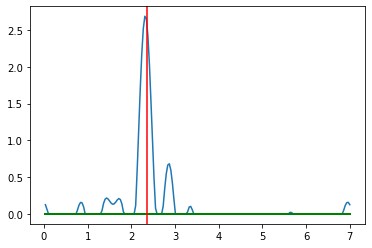

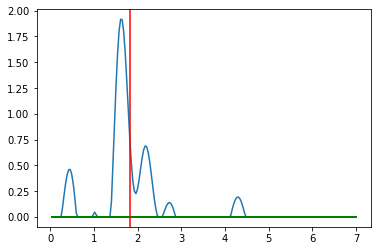

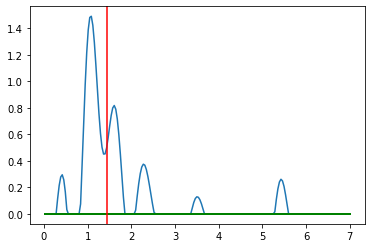

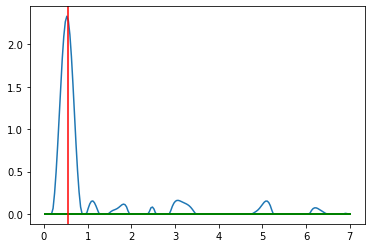

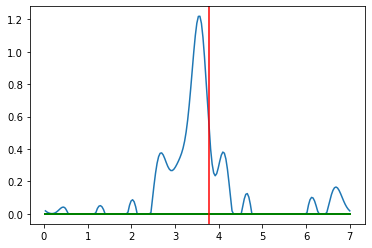

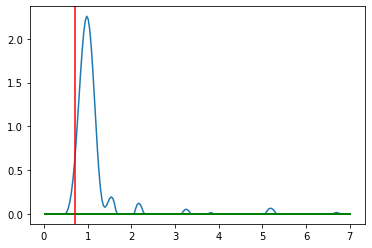

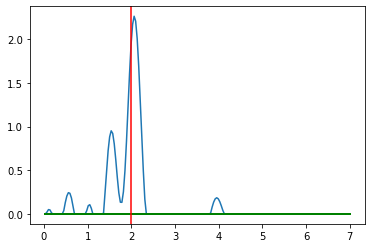

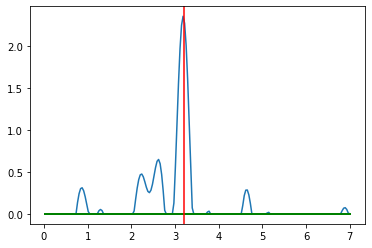

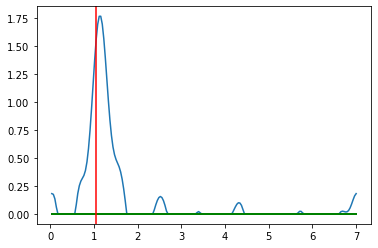

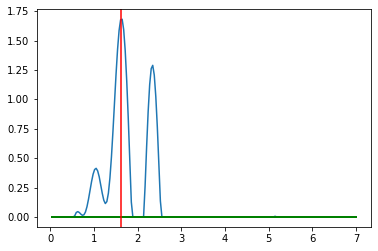

In [26]:
# Calculate conditional density estimates
cdes, z_grid = model_pz_4.predict(teste[[item+"_iso" for item in feat]+wise+galex].values, n_grid=200)

for ii in range(10):
    true_density = scipy.stats.norm.pdf(z_grid, teste[[item+"_iso" for item in feat]+wise+galex].values[ii], 1)
    plt.plot(z_grid, cdes[ii, :])
    plt.plot(z_grid, true_density, color = "green")
    plt.axvline(x=teste['Z'].values[ii], color="red")
    plt.show()

**5º: Modelo 4 considerando base cosine**

In [27]:
# Parameterize model
model_pz_5 = flexcode.FlexCodeModel(RandomForest, max_basis=31, basis_system="cosine",
                               regression_params={'random_state':47})

In [28]:
%%time
# Fit model
model_pz_5.fit(trainf0[[item+"_iso" for item in feat]+wise+galex].values, trainf0['Z'].values)

Wall time: 3min 25s


In [29]:
%%time
# Tune model - seleciona o melhor numero de bases
model_pz_5.tune(validf0[[item+"_iso" for item in feat]+wise+galex].values, validf0['Z'].values)

Wall time: 3min 15s


In [30]:
# Estimate CDE loss
print(model_pz_5.estimate_error(teste[[item+"_iso" for item in feat]+wise+galex].values, teste['Z'].values))

-1.6143674102842898


Comparando os modelos 4 e 5 com as bases de Fourier e cossenos, respectivamente, vemos que o modelo com a base de Fourier tem uma estimativa da função de perda menor que o modelo com a base de cossenos.

**6º: Modelo 4 com regressor XGBoosting**

In [15]:
# Parameterize model
model_pz_6 = flexcode.FlexCodeModel(XGBoost, max_basis=40, basis_system='Fourier',
                               regression_params={"max_depth":8, 'random_state':47})

In [16]:
%%time
# Fit model
model_pz_6.fit(trainf0[[item+"_iso" for item in feat]+wise+galex].values, trainf0['Z'].values)

Wall time: 3min 40s


In [17]:
%%time
# Tune model - seleciona o melhor numero de bases
model_pz_6.tune(validf0[[item+"_iso" for item in feat]+wise+galex].values, validf0['Z'].values)

Wall time: 7.3 s


In [18]:
# Estimate CDE loss
print(model_pz_6.estimate_error(teste[[item+"_iso" for item in feat]+wise+galex].values, teste['Z'].values))

-1.8218544204310407


**7º: Modelo 6 sem filtros _narrow_**

In [19]:
# Parameterize model
model_pz_7 = flexcode.FlexCodeModel(XGBoost, max_basis=40, basis_system='Fourier',
                               regression_params={"max_depth":8, 'random_state':47})

In [20]:
%%time
# Fit model
model_pz_7.fit(trainf0[['U_iso','G_iso','R_iso','I_iso','Z_iso']+wise+galex].values, trainf0['Z'].values)

Wall time: 1min 59s


In [21]:
%%time
# Tune model - seleciona o melhor numero de bases
model_pz_7.tune(validf0[['U_iso','G_iso','R_iso','I_iso','Z_iso']+wise+galex].values, validf0['Z'].values)

Wall time: 6.22 s


In [22]:
# Estimate CDE loss
print(model_pz_7.estimate_error(teste[['U_iso','G_iso','R_iso','I_iso','Z_iso']+wise+galex].values, teste['Z'].values))

-1.0615777330992988


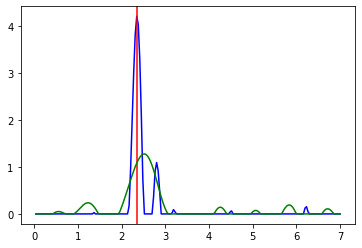

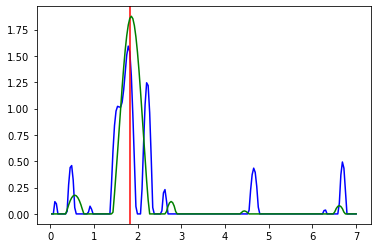

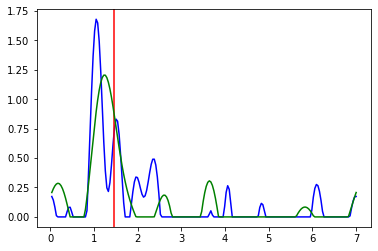

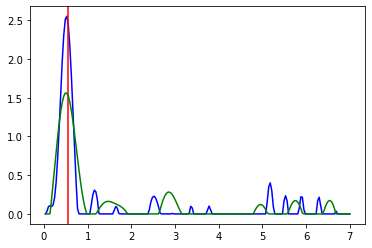

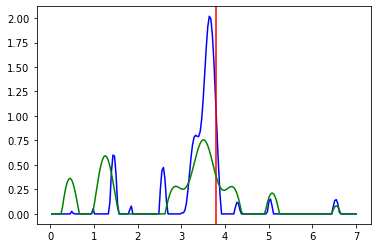

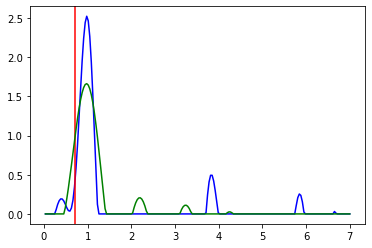

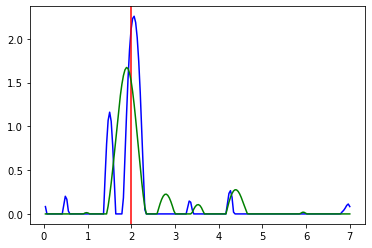

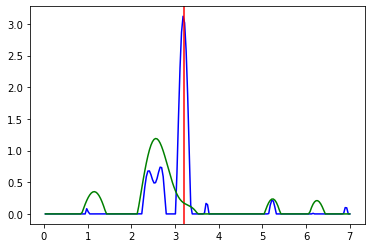

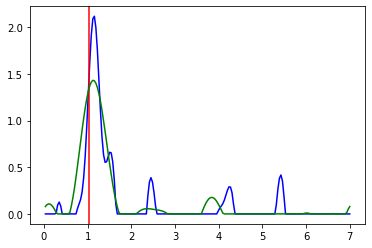

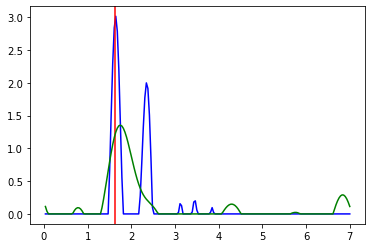

In [27]:
# Comparando est. dens. cond. com e sem narrow_bands
cdes6, z_grid6 = model_pz_6.predict(teste[[item+"_iso" for item in feat]+wise+galex].values, n_grid=200)
cdes7, z_grid7 = model_pz_7.predict(teste[['U_iso','G_iso','R_iso','I_iso','Z_iso']+wise+galex].values, n_grid=200)

for ii in range(10):
    plt.plot(z_grid6, cdes6[ii, :], color='blue') # MODELO COM NARROW BANDS
    plt.axvline(x=teste['Z'].values[ii], color="red")
    plt.plot(z_grid7, cdes7[ii, :],color='green') # MODELO SEM NARROW BANDS
    plt.show()

Existe uma mudança significativa de quase 0.6 na função de perda do modelo com os filtros de banda estreita, o que já é um indicativo que melhoram a predição de p(z).

**8º: Modelo mudando tuning parâmetros**

In [28]:
# Parameterize model
model_pz_8 = flexcode.FlexCodeModel(RandomForest, max_basis=31, basis_system="Fourier",
                               regression_params={'random_state':47, "n_estimators":100})

In [29]:
%%time
# Fit model
model_pz_8.fit(trainf0[[item+"_iso" for item in feat]+wise+galex].values, trainf0['Z'].values)

Wall time: 2min 36s


In [30]:
%%time
# Tune model - seleciona o melhor numero de bases
model_pz_8.tune(validf0[[item+"_iso" for item in feat]+wise+galex].values, validf0['Z'].values,
                   bump_threshold_grid=np.array([0.2,0.25,0.3,0.35,0.4]),sharpen_grid=np.array([3.5,3.6,3.7,3.8]))

Wall time: 1min 20s


In [31]:
model_pz_8.estimate_error(teste[[item+"_iso" for item in feat]+wise+galex].values, teste['Z'].values)

22.870349636416865

**OBS! A função de risco estimada deu diferente da usada no Python nos diversos argumentos da função. Resultados não serão considerados no relatório**